In [2]:
first_name= "Alireza"
last_name= "Fayyazi"
student_number= "401208464"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
x_train = np.load('F:/mnist/x_train.npy')
y_train = np.load('F:/mnist/y_train.npy')
x_test = np.load('F:/mnist/x_test.npy')
y_test = np.load('F:/mnist/y_test.npy')
#from keras.datasets import mnist
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.nan_to_num(x_train, nan=0)
x_test = np.nan_to_num(x_test, nan=0)

In [50]:
y_train.shape

(60000,)

In [51]:
def show_images(num_images, X):
    fig, axes = plt.subplots(5, 10, figsize=(10, 5))
    axes = axes.flatten()
    for i in range(num_images):
        axes[i].imshow(X[i], cmap='gray')
        axes[i].axis('off')
    plt.show()

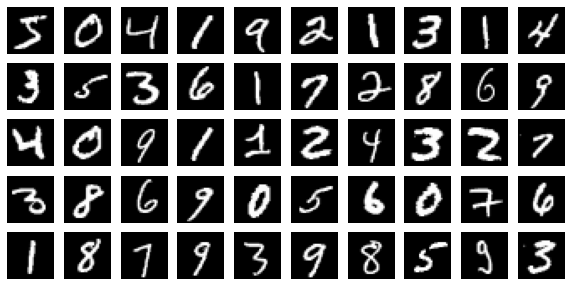

In [52]:
show_images(50,x_train)

In [7]:
x_train_s = x_train.reshape(60000, 784)/np.max(x_train)
x_test_s = x_test.reshape(10000, 784)/np.max(x_test)

In [54]:
x_train_s.shape

(60000, 784)

در اینجا تابع کوواریانس آموزش و تست را جداگانه حساب میکنیم. بردار ویژه ها و مقادیرویژه را هم به دست میآوریم. سپس اندیس هایی که متناظر با چیدن مقادیر ویژه از بزرگ به کوچک هستند را محاسبه میکنیم و بردارهای ویژه و مقادیر ویژه را متناسب با این اندیس ها حساب میکنیم و آنها را از مقادیر ویژه ی بزرگ به کوچک مرتب میکنیم. . 

In [8]:
covariance_matrix_train = np.cov(x_train_s, rowvar=False)
covariance_matrix_test = np.cov(x_test_s, rowvar=False)
eigenvalues_train, eigenvectors_train = np.linalg.eig(covariance_matrix_train)
eigenvalues_test, eigenvectors_test = np.linalg.eig(covariance_matrix_test)
sorted_indices_train = np.argsort(eigenvalues_train)[::-1]
sorted_indices_test = np.argsort(eigenvalues_test)[::-1]
eigenvalues_train = eigenvalues_train[sorted_indices_train]
eigenvalues_test = eigenvalues_test[sorted_indices_test]
eigenvectors_train = eigenvectors_train[:, sorted_indices_train]
eigenvectors_test = eigenvectors_test[:, sorted_indices_test]

با واریانسی که در صورت سوال گفته شده و برابر با 0.7 بود،نتایج خوبی به دست نمی آوردیم و الگوریتم آنالیز مولفه های اصلی قادر به بازسازی تصاویر ورودی به صورت درست نبود. 
در اینجا با جمع مقادیر بردار ویژه ها تخمینی از واریانس های دادگان را محاسبه میکنیم. سپس جمع درایه های بردارویژه ها را به صورت تجمعی در برداری ذخیره میکنیم و بر واریانس کلی تقسیم میکنیم و با 0.9 مقایسه میکنیم تا ببینیم به چند تا از درایه های بردارویژه ها نیاز داریم تا به مقدار واریانس دلخواهی که در نظر گرفتیم برسیم..  

In [56]:
explained_variance = 0.9 
total_variance_train = np.sum(eigenvalues_train)
total_variance_test = np.sum(eigenvalues_test)
c_eigenvalues_train = np.cumsum(eigenvalues_train)
c_eigenvalues_test = np.cumsum(eigenvalues_test)
k_train = np.argmax((c_eigenvalues_train / total_variance_train ) >= explained_variance) + 1
k_test = np.argmax((c_eigenvalues_test / total_variance_test ) >= explained_variance) + 1
compression_ratio_train = (x_train.shape[1] - k_train) / x_train.shape[1]
compression_ratio_test = (x_test.shape[1] - k_test) / x_test.shape[1]

در اینجا نیز با توجه به تعدادی که برای به دست اوردن واریانس مطلوب کفایت میکند، تعدادی از بردارهای ویژه را جدا میکنیم. 

In [57]:
V_train = eigenvectors_train[:,0:k_train]
V_test = eigenvectors_test[:,0:k_test]

F در اینجا همان دادگان کاهش بعد یافته است که با ضرب در ترانهاده ی ماتریس بردارهای ویژه، به فضای اصلی تصویر بازگردانده میشود.

In [58]:
F_train = np.dot(x_train_s, V_train)
X_k = np.dot(F_train, V_train.T)

In [59]:
V_train.shape

(784, 87)

In [60]:
F_train.shape

(60000, 87)

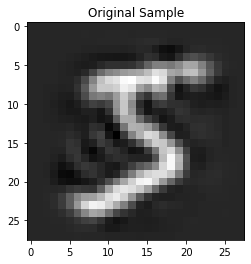

In [61]:
X_k = X_k.reshape(60000,28,28)
plt.imshow(X_k[0,:,:], cmap='gray')
plt.title('Original Sample')
plt.show()

In [62]:
k_train

87

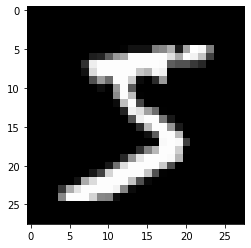

In [63]:
plt.imshow(x_train[0,:,:], cmap='gray')

In [64]:
F_train.shape

(60000, 87)

In [65]:
def do_pca(n_components, data1, data2):
    pca = PCA(n_components=n_components)
    projected_data1 = pca.fit_transform(data1)
    projected_data2 = pca.transform(data2)
    return projected_data1, projected_data2

In [67]:
x_train_sc = x_train.reshape(60000,784)
x_test_sc = x_test.reshape(10000,784)

In [68]:
 def ML_model(x_train, y_train, x_test, y_test, model, print_output=True):
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    acc = accuracy_score(y_test, y_predict)
    if print_output:
        print("Accuracy:", acc)
    return acc

In [40]:
x_test_s = x_test.reshape(10000,784)

In [69]:
pc = 100
train,test = do_pca(pc,x_train_s,x_test_s)
model = KNeighborsClassifier()
acc = ML_model(train, y_train, test, y_test, model, print_output=True)


Accuracy: 0.973


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.4203
Accuracy: 0.5054
Accuracy: 0.6509
Accuracy: 0.7595
Accuracy: 0.8365
Accuracy: 0.8734
Accuracy: 0.8946
Accuracy: 0.901
Accuracy: 0.9131
Accuracy: 0.9195
Accuracy: 0.9303
Accuracy: 0.9343
Accuracy: 0.9397
Accuracy: 0.9389
Accuracy: 0.9426
Accuracy: 0.9453
Accuracy: 0.9466
Accuracy: 0.9474
Accuracy: 0.9476
Accuracy: 0.9502
Accuracy: 0.9496
Accuracy: 0.9506
Accuracy: 0.9521
Accuracy: 0.9514
Accuracy: 0.9503
Accuracy: 0.9513
Accuracy: 0.9529
Accuracy: 0.9532
Accuracy: 0.9542
Accuracy: 0.955
Accuracy: 0.9539
Accuracy: 0.9553
Accuracy: 0.955
Accuracy: 0.9542
Accuracy: 0.9545
Accuracy: 0.9551
Accuracy: 0.955
Accuracy: 0.9546
Accuracy: 0.9534
Accuracy: 0.9534
Accuracy: 0.9564
Accuracy: 0.9532
Accuracy: 0.9541
Accuracy: 0.9525
Accuracy: 0.9554
Accuracy: 0.9552
Accuracy: 0.9544
Accuracy: 0.9541
Accuracy: 0.9549
Accuracy: 0.9563
Accuracy: 0.9537
Accuracy: 0.954
Accuracy: 0.9543
Accuracy: 0.9547
Accuracy: 0.9546
Accuracy: 0.9566
Accuracy: 0.9534
Accuracy: 0.9552
Accuracy: 0.9538
Ac

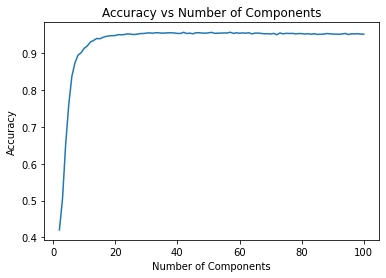

In [73]:
acc_list, pc_list = [], []
for pc in range(2, 101):
    train,test = do_pca(pc,x_train_sc,x_test_sc)
    model = RandomForestClassifier()
    acc = ML_model(train, y_train, test, y_test, model, print_output=True)
    acc_list.append(acc)
    pc_list.append(pc)
plt.plot(pc_list, acc_list)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.show()